In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.shape

(5572, 2)

In [7]:
df.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [8]:
for i in range(0,5572):
    if df['v1'][i]=="spam":
        df['v1'][i]=1
    else:
        df['v1'][i]=0

In [9]:
df['v1']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: object

In [10]:
df.v1.value_counts()

0    4825
1     747
Name: v1, dtype: int64

In [11]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [12]:
df.sample(10)

,target,text
2659,0,Ok...
1593,1,PRIVATE! Your 2003 Account Statement for shows...
1575,0,"Sounds gd... Haha... Can... Wah, u yan jiu so ..."
2165,0,I'm not coming home 4 dinner.
5562,0,Ok lor... Sony ericsson salesman... I ask shuh...
3435,0,If india win or level series means this is rec...
2008,0,See the forwarding message for proof
1677,0,Lol where do u come up with these ideas?
5169,0,Now i'm going for lunch.
9,1,Had your mobile 11 months or more? U R entitle...


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

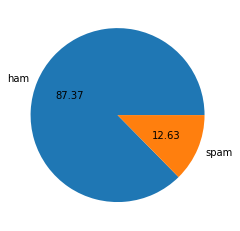

In [19]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
import nltk

In [21]:
from nltk import punkt

In [22]:
df['num_char']=df['text'].apply(len)

In [23]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df.describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
import seaborn as sns

<AxesSubplot:xlabel='num_char', ylabel='Count'>

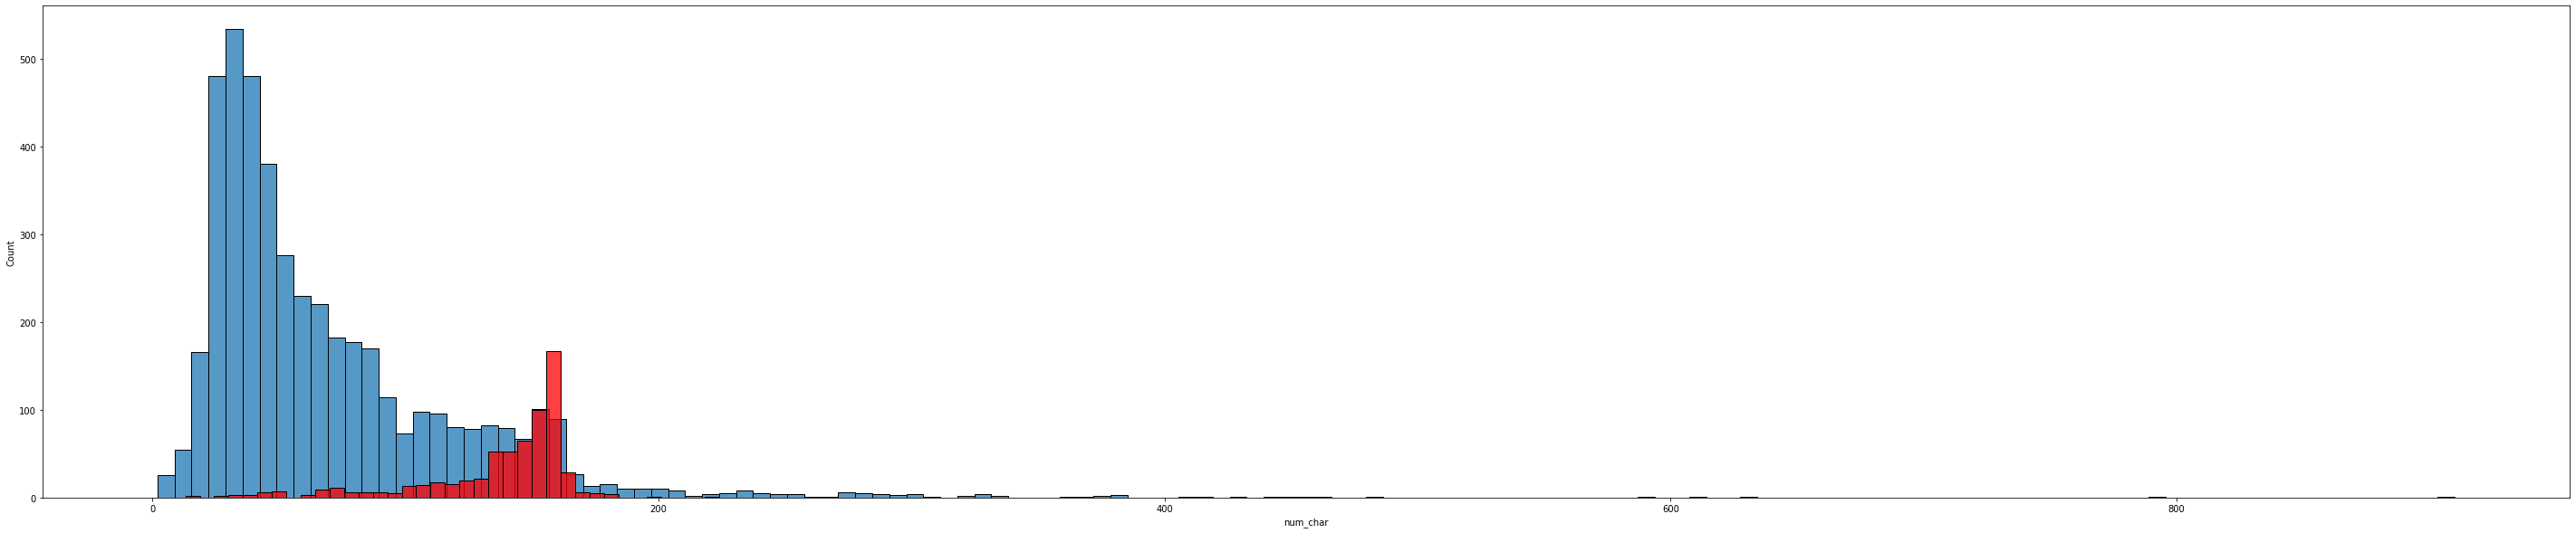

In [30]:
plt.figure(figsize=(50,10))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')


<AxesSubplot:xlabel='num_word', ylabel='Count'>

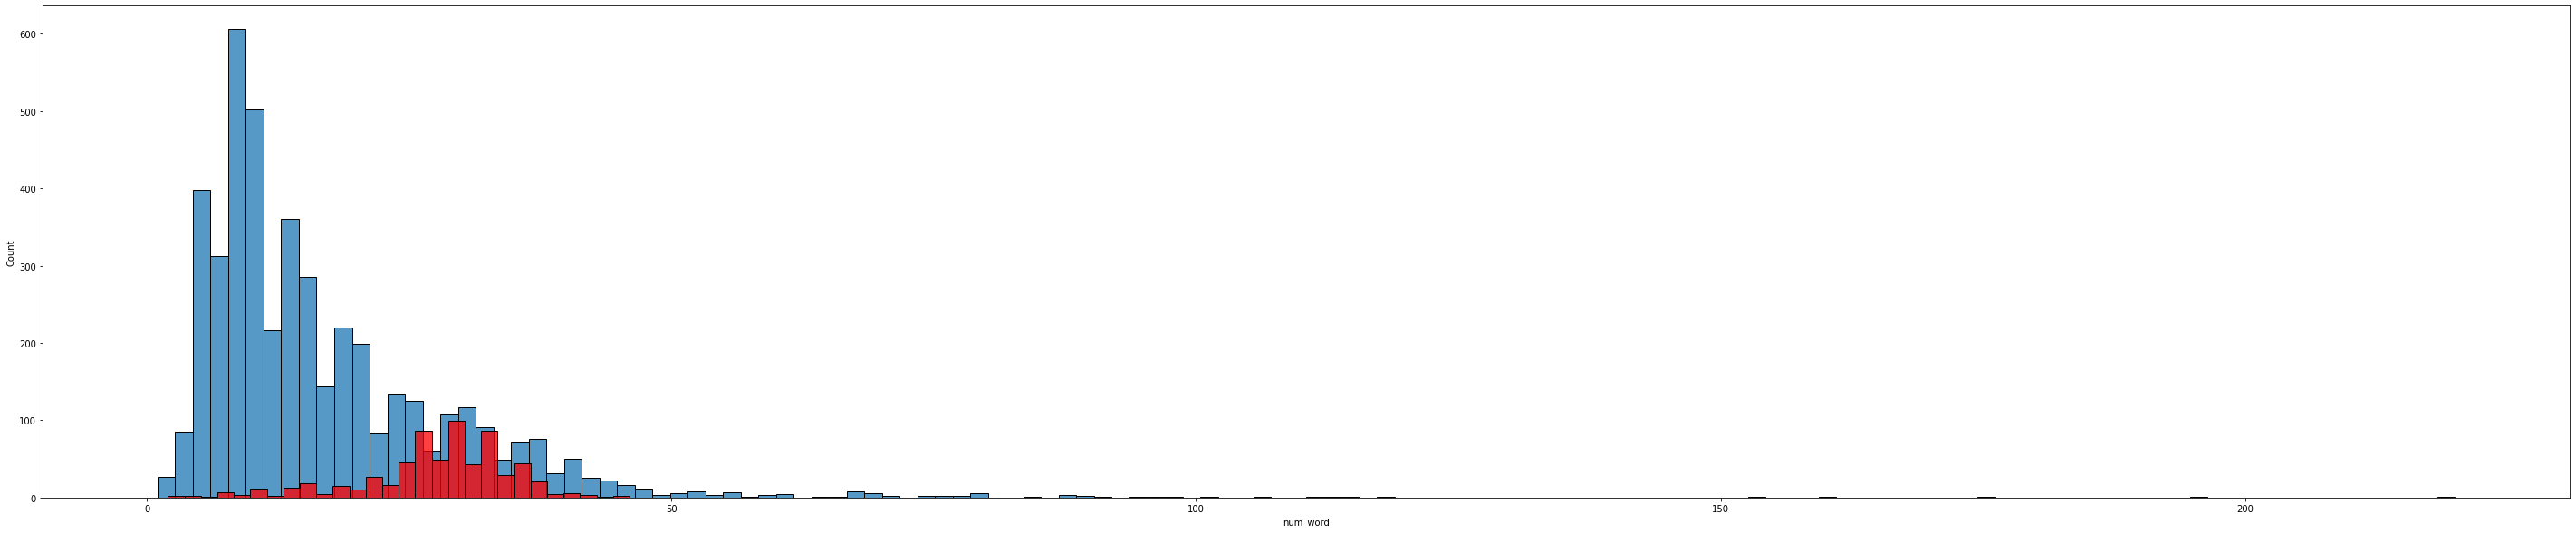

In [31]:
plt.figure(figsize=(50,10))
sns.histplot(df[df['target']==0]['num_word'])
sns.histplot(df[df['target']==1]['num_word'],color='red')


<AxesSubplot:xlabel='num_sent', ylabel='Count'>

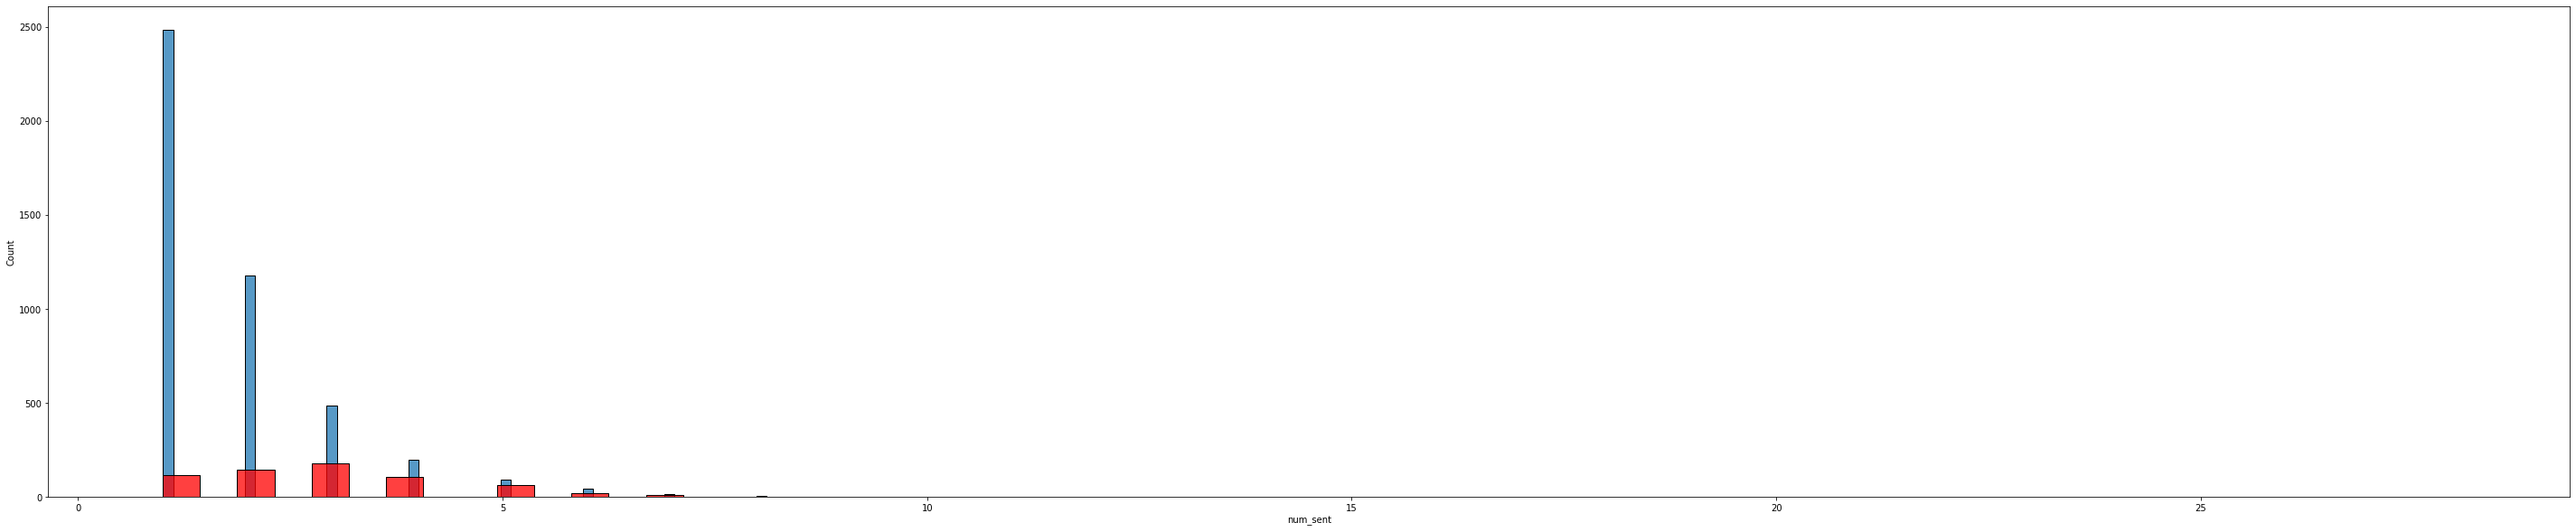

In [32]:
plt.figure(figsize=(50,10))
sns.histplot(df[df['target']==0]['num_sent'])
sns.histplot(df[df['target']==1]['num_sent'],color='red')


<Figure size 2160x720 with 0 Axes>

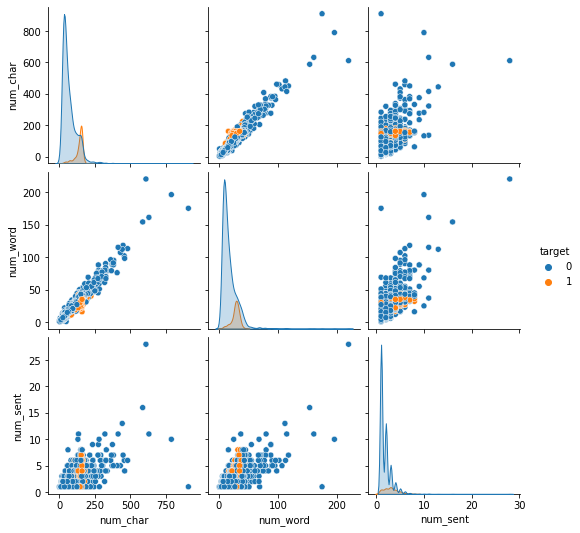

In [33]:
plt.figure(figsize=(30,10))
sns.pairplot(df,hue='target')

<AxesSubplot:>

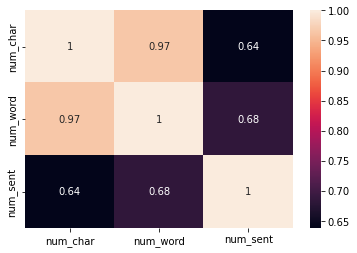

In [34]:
sns.heatmap(df.corr(),annot=True)

In [36]:
from nltk.corpus import stopwords

In [37]:
import string

In [38]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

In [39]:
ps.stem('sleeping')

'sleep'

In [40]:
def transform_text(text):
    text=text.lower()
    text= nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [41]:
transform_text('%% i am good madhvendra sleeping eating ?')

'good madhvendra sleep eat'

In [42]:
df['trans_text']=df['text'].apply(transform_text)

In [43]:
df.head(10)

,target,text,num_char,num_word,num_sent,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


In [44]:
from wordcloud import WordCloud
wc= WordCloud(width=2000,height=2000,min_font_size=10,background_color='black')

In [45]:
spam_wc= wc.generate(df[df['target']==1]['trans_text'].str.cat(sep=" "))

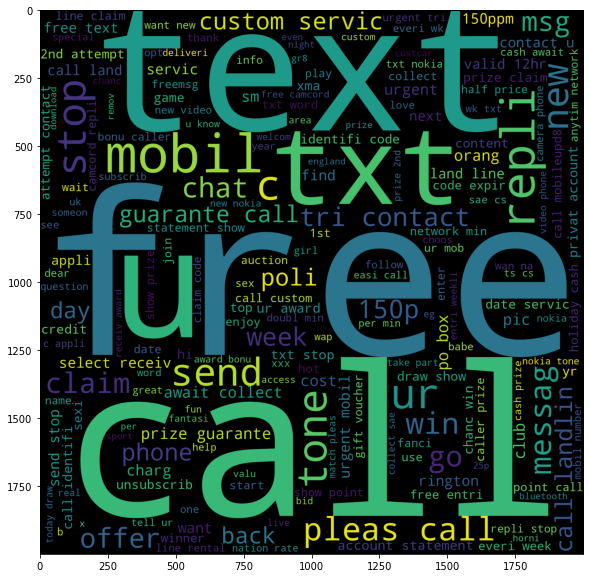

In [46]:
plt.figure(figsize=(30,10))
plt.imshow(spam_wc)


In [47]:
ham_wc= wc.generate(df[df['target']==0]['trans_text'].str.cat(sep=" "))

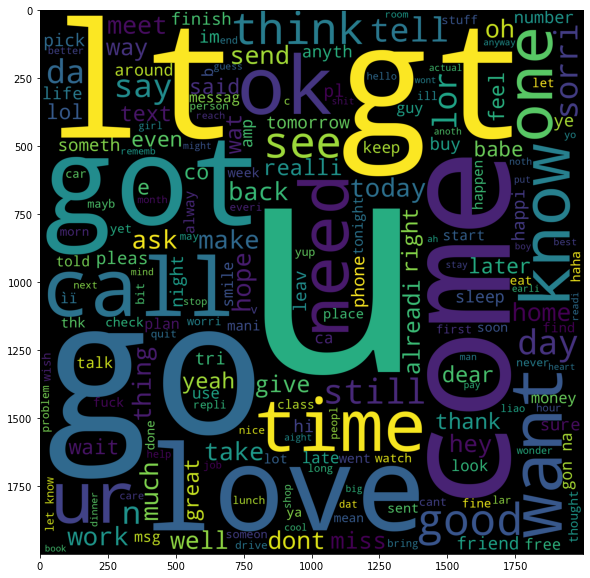

In [48]:
plt.figure(figsize=(30,10))
plt.imshow(ham_wc)

In [49]:
spam_corpus=[]
for i in df[df['target']== 1]['trans_text'].tolist():
    for j in i.split():
        spam_corpus.append(j)

In [50]:
len(spam_corpus)

9939

In [51]:
from collections import Counter

/root/anaconda3/envs/exp1/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


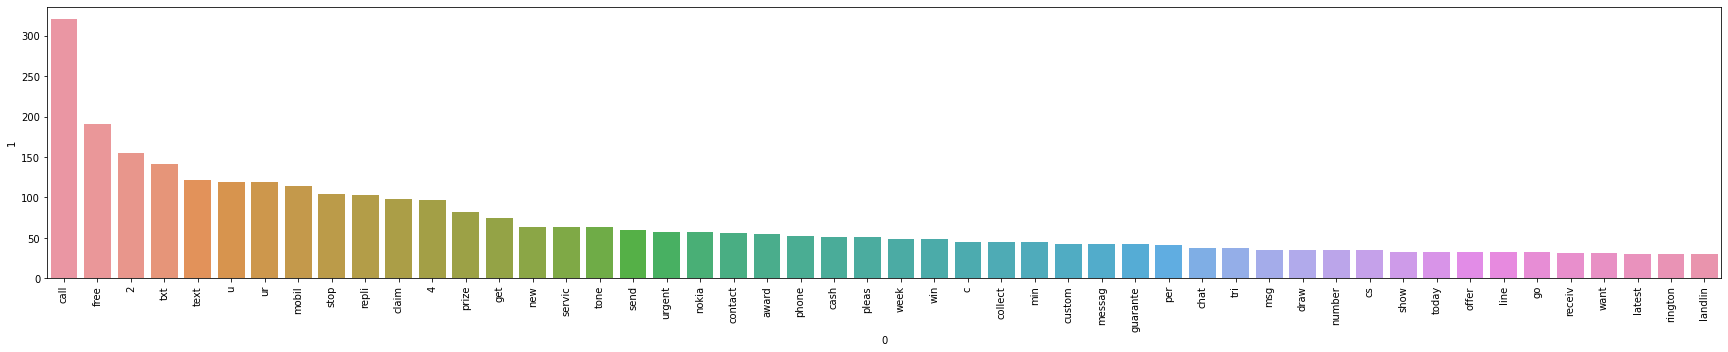

In [52]:
plt.figure(figsize=(30,5))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(50))[0],pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

In [53]:
ham_corpus=[]
for i in df[df['target']== 0]['trans_text'].tolist():
    for j in i.split():
        ham_corpus.append(j)

In [54]:
len(ham_corpus)

35394

/root/anaconda3/envs/exp1/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


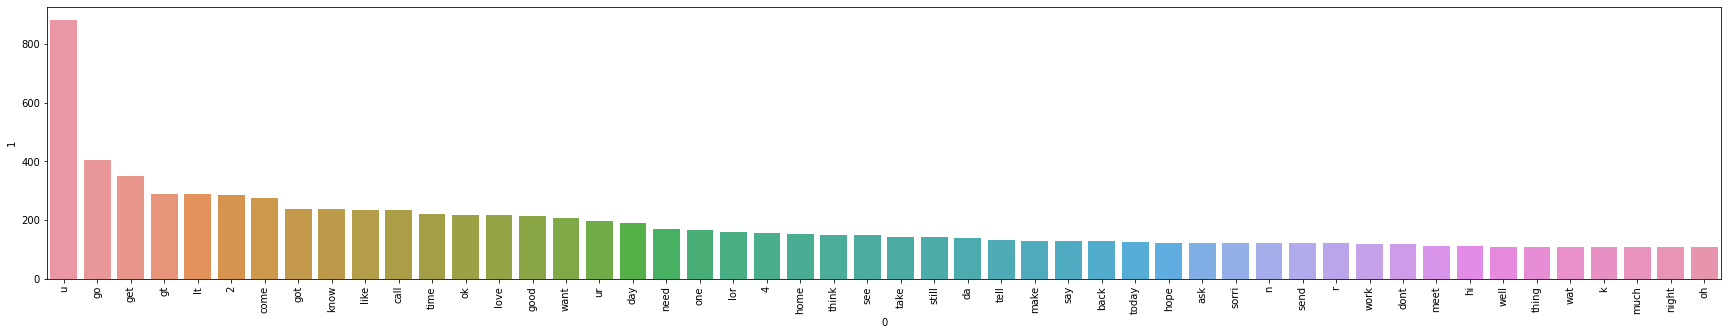

In [55]:
plt.figure(figsize=(30,5))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(50))[0],pd.DataFrame(Counter(ham_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

In [57]:
x = cv.fit_transform(df['trans_text']).toarray()

In [58]:
x.shape

(5169, 6708)

In [59]:
y = df['target'].values

In [60]:
y.shape

(5169,)

In [61]:
y=y.astype('int')

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [64]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [65]:
y_train.astype

<function ndarray.astype>

In [66]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [68]:
gnb= GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [69]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8684719535783365
[[772 117]
 [ 19 126]]
0.5185185185185185


In [70]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738878143133463
[[872  17]
 [ 10 135]]
0.8881578947368421


In [71]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542
